<a href="https://colab.research.google.com/github/srasoulzadeh/tensorflow-keras-coreml-mnist-sample/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install coremltools

     |████████████████████████████████| 3.4MB 7.9MB/s 
  Created wheel for attr: filename=attr-0.3.1-cp37-none-any.whl size=2458 sha256=47dd1b2f754ba622fc5fae7903f2dd448b0471cf02a309da3b6db064b3032c1c
  Stored in directory: /root/.cache/pip/wheels/f0/96/9b/1f8892a707d17095b5a6eab0275da9d39e68e03a26aee2e726
Successfully built attr


In [ ]:
google_drive_proj_dir = '/content/drive/MyDrive/Vienna University of Technology/mnist-sample'

In [ ]:
import coremltools as ct
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import tensorflow as tf

from PIL import Image
from tensorflow.keras import backend as K
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, Input, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [ ]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)
print(Y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')/255
Y_train = to_categorical(Y_train, 10)

X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_test = X_test.astype('float32')/255
Y_test = to_categorical(Y_test, 10)

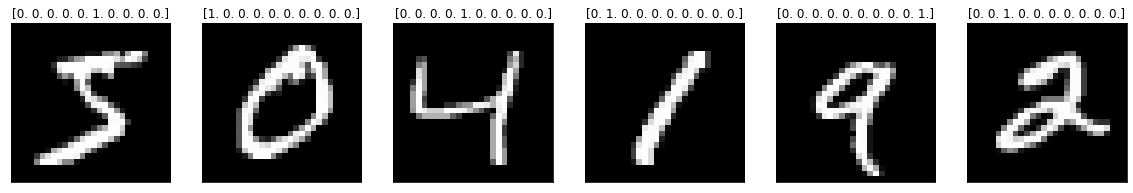

In [ ]:
fig = plt.figure(figsize=(20, 20))
for i in range(6):
    ax = fig.add_subplot(1, 6, i+1, 
                         xticks=[], 
                         yticks=[])
    ax.imshow(np.squeeze(X_train[i], axis=-1), cmap='gray')
    ax.set_title(str(Y_train[i]))

In [ ]:
model = Sequential()

model.add(Input(shape=(28, 28, 1)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4128      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 32)          4128      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 288)               0

In [ ]:
model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(), 
              metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=512, epochs=16, verbose=1)

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/16
118/118 [==============================] - 8s 8ms/step - loss: 1.1657 - accuracy: 0.6685
Epoch 2/16
118/118 [==============================] - 1s 7ms/step - loss: 0.1270 - accuracy: 0.9619
Epoch 3/16
118/118 [==============================] - 1s 7ms/step - loss: 0.0829 - accuracy: 0.9740
Epoch 4/16
118/118 [==============================] - 1s 7ms/step - loss: 0.0576 - accuracy: 0.9830
Epoch 5/16
118/118 [==============================] - 1s 7ms/step - loss: 0.0509 - accuracy: 0.9836
Epoch 6/16
118/118 [==============================] - 1s 7ms/step - loss: 0.0418 - accuracy: 0.9869
Epoch 7/16
118/118 [==============================] - 1s 8ms/step - loss: 0.0352 - accuracy: 0.9893
Epoch 8/16
118/118 [==============================] - 1s 8ms/step - loss: 0.0309 - accuracy: 0.9902
Epoch 9/16
118/118 [==============================] - 1s 7ms/step - loss: 0.0273 - accuracy: 0.9917
Epoch 10/16
118/118 [==============================] - 1s 8ms/step - loss: 0.0281 - accuracy: 0.9901

In [ ]:
# Define the input type as image
image_input = ct.ImageType(shape=(1, 28, 28, 1), scale=1/255)

# set class labels
classifier_config = ct.ClassifierConfig(
    class_labels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])

# Convert the model using the Unified Conversion API
model = ct.convert(
    model, inputs=[image_input], classifier_config=classifier_config)

Translating MIL ==> MLModel Ops: 100%|██████████| 55/55 [00:00<00:00, 1581.42 ops/s]


In [ ]:
# Save model
model.save(os.path.join(google_drive_proj_dir, 'MNISTSample.mlmodel'))